In [1]:
ls

 Volume in drive C is OS
 Volume Serial Number is A840-308D

 Directory of C:\Users\ayishik\BackTrader Practice

03-09-2020  19:57    <DIR>          .
03-09-2020  19:57    <DIR>          ..
03-09-2020  18:56    <DIR>          .ipynb_checkpoints
03-09-2020  18:55           345,989 orcl-1995-2014.txt
03-09-2020  19:57           305,110 Prac1.ipynb
               2 File(s)        651,099 bytes
               3 Dir(s)  41,217,945,600 bytes free


In [2]:
f = open('orcl-1995-2014.txt','r')
datapile = f.read()
f.close

<function TextIOWrapper.close()>

In [3]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
#     modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
#     datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='orcl-1995-2014.txt',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values after this date
        todate=datetime.datetime(2000, 12, 31),
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


In [4]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
# global count 
# count = 0
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))
#         print(type(txt))
#         print(dt)

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        self.count = 0

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])
        
        #self.dataclose[0] is the closing 

        if self.dataclose[0] < self.dataclose[-1]:
            # current close less than previous close

            if self.dataclose[-1] < self.dataclose[-2]:
                
#                 if self.dataclose[-2] < self.dataclose[-3]:
                    # previous close less than the previous close

                    # BUY, BUY, BUY!!! (with all possible default parameters)
                    self.log('BUY CREATE, %.2f' % self.dataclose[0])
                    self.buy()
                    self.count += 1
                    print(self.count)


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
#     modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
#     datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='orcl-1995-2014.txt',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 26.27
2000-01-04, Close, 23.95
2000-01-05, Close, 22.68
2000-01-05, BUY CREATE, 22.68
1
2000-01-06, Close, 21.35
2000-01-06, BUY CREATE, 21.35
2
2000-01-07, Close, 22.99
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-12, BUY CREATE, 23.49
3
2000-01-13, Close, 23.36
2000-01-13, BUY CREATE, 23.36
4
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-27, BUY CREATE, 23.04
5
2000-01-28, Close, 21.07
2000-01-28, BUY CREATE, 21.07
6
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-07, Close, 26.66
2000-02-08, Close, 26.49
2000-02-09, Close, 26.66
2000-02-10, Close, 27.71
2000-02-11, Close, 26.55
2000-02-14, Close, 27.66
2000-02-15, Close, 27.

In [29]:
'''
Final Portfolio Value: 99740.45
Count = 62
    
Final Portfolio Value: 99909.71
Count = 24
'''

'\nFinal Portfolio Value: 99740.45\nCount = 62\n    \nFinal Portfolio Value: 99909.71\nCount = 24\n'

Starting Portfolio Value: 100000.00
1999-01-22, Close, 1.52
1999-01-22, BUY CREATE, 1.52
1999-01-25, BUY EXECUTED, 1.64
1999-01-25, Close, 1.68
1999-01-26, Close, 1.55
1999-01-27, Close, 1.54
1999-01-28, Close, 1.54
1999-01-29, Close, 1.47
1999-02-01, Close, 1.49
1999-02-01, SELL CREATE, 1.49
1999-02-02, SELL EXECUTED, 1.47
1999-02-02, Close, 1.38
1999-02-03, Close, 1.41
1999-02-04, Close, 1.48
1999-02-05, Close, 1.53
1999-02-08, Close, 1.48
1999-02-09, Close, 1.42
1999-02-09, BUY CREATE, 1.42
1999-02-10, BUY EXECUTED, 1.42
1999-02-10, Close, 1.40
1999-02-11, Close, 1.52
1999-02-12, Close, 1.61
1999-02-16, Close, 1.62
1999-02-17, Close, 1.53
1999-02-18, Close, 1.56
1999-02-18, SELL CREATE, 1.56
1999-02-19, SELL EXECUTED, 1.54
1999-02-19, Close, 1.61
1999-02-22, Close, 1.62
1999-02-23, Close, 1.70
1999-02-24, Close, 1.83
1999-02-25, Close, 1.77
1999-02-26, Close, 1.69
1999-02-26, BUY CREATE, 1.69
1999-03-01, BUY EXECUTED, 1.74
1999-03-01, Close, 1.70
1999-03-02, Close, 1.69
1999-03-03, 

2002-07-25, Close, 4.65
2002-07-25, SELL CREATE, 4.65
2002-07-26, SELL EXECUTED, 4.78
2002-07-26, Close, 4.54
2002-07-26, BUY CREATE, 4.54
2002-07-29, BUY EXECUTED, 4.73
2002-07-29, Close, 4.66
2002-07-30, Close, 5.00
2002-07-31, Close, 3.42
2002-08-01, Close, 3.09
2002-08-02, Close, 2.88
2002-08-05, Close, 2.65
2002-08-05, SELL CREATE, 2.65
2002-08-06, SELL EXECUTED, 2.78
2002-08-06, Close, 2.79
2002-08-07, Close, 2.73
2002-08-08, Close, 2.91
2002-08-09, Close, 2.84
2002-08-12, Close, 2.84
2002-08-13, Close, 2.78
2002-08-14, Close, 2.97
2002-08-15, Close, 3.17
2002-08-16, Close, 3.30
2002-08-19, Close, 3.90
2002-08-20, Close, 3.73
2002-08-21, Close, 3.93
2002-08-22, Close, 3.79
2002-08-23, Close, 3.54
2002-08-23, BUY CREATE, 3.54
2002-08-26, BUY EXECUTED, 3.61
2002-08-26, Close, 3.57
2002-08-27, Close, 3.37
2002-08-28, Close, 3.16
2002-08-29, Close, 3.20
2002-08-30, Close, 3.12
2002-09-03, Close, 2.92
2002-09-03, SELL CREATE, 2.92
2002-09-04, SELL EXECUTED, 2.93
2002-09-04, Close, 2.9

2005-04-22, Close, 6.86
2005-04-25, Close, 6.97
2005-04-26, Close, 6.94
2005-04-27, Close, 6.67
2005-04-27, BUY CREATE, 6.67
2005-04-28, BUY EXECUTED, 6.65
2005-04-28, Close, 6.69
2005-04-29, Close, 6.77
2005-05-02, Close, 6.74
2005-05-03, Close, 6.70
2005-05-04, Close, 6.92
2005-05-05, Close, 7.05
2005-05-05, SELL CREATE, 7.05
2005-05-06, SELL EXECUTED, 7.14
2005-05-06, Close, 7.15
2005-05-09, Close, 7.28
2005-05-10, Close, 7.00
2005-05-11, Close, 6.88
2005-05-11, BUY CREATE, 6.88
2005-05-12, BUY EXECUTED, 6.88
2005-05-12, Close, 7.03
2005-05-13, Close, 7.81
2005-05-16, Close, 7.84
2005-05-17, Close, 7.93
2005-05-18, Close, 7.99
2005-05-19, Close, 7.97
2005-05-19, SELL CREATE, 7.97
2005-05-20, SELL EXECUTED, 7.96
2005-05-20, Close, 8.11
2005-05-23, Close, 8.30
2005-05-24, Close, 8.42
2005-05-25, Close, 8.31
2005-05-26, Close, 8.55
2005-05-27, Close, 8.49
2005-05-31, Close, 8.36
2005-05-31, BUY CREATE, 8.36
2005-06-01, BUY EXECUTED, 8.30
2005-06-01, Close, 8.44
2005-06-02, Close, 8.75


2008-01-24, Close, 23.94
2008-01-25, Close, 23.09
2008-01-28, Close, 22.81
2008-01-28, BUY CREATE, 22.81
2008-01-29, BUY EXECUTED, 23.22
2008-01-29, Close, 23.52
2008-01-30, Close, 23.31
2008-01-31, Close, 22.76
2008-02-01, Close, 24.86
2008-02-04, Close, 24.08
2008-02-05, Close, 22.57
2008-02-05, SELL CREATE, 22.57
2008-02-06, SELL EXECUTED, 22.81
2008-02-06, Close, 22.50
2008-02-06, BUY CREATE, 22.50
2008-02-07, BUY EXECUTED, 21.85
2008-02-07, Close, 22.72
2008-02-08, Close, 23.13
2008-02-11, Close, 23.20
2008-02-12, Close, 24.06
2008-02-13, Close, 25.01
2008-02-14, Close, 20.93
2008-02-14, SELL CREATE, 20.93
2008-02-15, SELL EXECUTED, 20.84
2008-02-15, Close, 20.61
2008-02-15, BUY CREATE, 20.61
2008-02-19, BUY EXECUTED, 20.99
2008-02-19, Close, 20.31
2008-02-20, Close, 20.16
2008-02-21, Close, 19.70
2008-02-22, Close, 20.66
2008-02-25, Close, 20.65
2008-02-26, Close, 20.82
2008-02-26, SELL CREATE, 20.82
2008-02-27, SELL EXECUTED, 20.72
2008-02-27, Close, 21.15
2008-02-28, Close, 20.

2011-01-14, Close, 21.83
2011-01-18, Close, 21.32
2011-01-19, Close, 20.74
2011-01-19, BUY CREATE, 20.74
2011-01-20, BUY EXECUTED, 20.54
2011-01-20, Close, 20.76
2011-01-21, Close, 20.56
2011-01-24, Close, 22.89
2011-01-25, Close, 22.18
2011-01-26, Close, 22.71
2011-01-27, Close, 22.65
2011-01-27, SELL CREATE, 22.65
2011-01-28, SELL EXECUTED, 22.70
2011-01-28, Close, 21.99
2011-01-28, BUY CREATE, 21.99
2011-01-31, BUY EXECUTED, 22.03
2011-01-31, Close, 22.14
2011-02-01, Close, 22.65
2011-02-02, Close, 23.67
2011-02-03, Close, 23.23
2011-02-04, Close, 23.76
2011-02-07, Close, 22.77
2011-02-07, SELL CREATE, 22.77
2011-02-08, SELL EXECUTED, 22.80
2011-02-08, Close, 22.09
2011-02-08, BUY CREATE, 22.09
2011-02-09, BUY EXECUTED, 22.18
2011-02-09, Close, 21.56
2011-02-10, Close, 21.12
2011-02-11, Close, 21.72
2011-02-14, Close, 21.39
2011-02-15, Close, 20.87
2011-02-16, Close, 21.64
2011-02-16, SELL CREATE, 21.64
2011-02-17, SELL EXECUTED, 21.03
2011-02-17, Close, 23.77
2011-02-18, Close, 23.

2013-09-24, Close, 14.86
2013-09-25, Close, 14.88
2013-09-26, Close, 14.83
2013-09-27, Close, 14.75
2013-09-30, Close, 14.73
2013-09-30, SELL CREATE, 14.73
2013-10-01, SELL EXECUTED, 14.75
2013-10-01, Close, 14.72
2013-10-01, BUY CREATE, 14.72
2013-10-02, BUY EXECUTED, 14.57
2013-10-02, Close, 14.71
2013-10-03, Close, 14.56
2013-10-04, Close, 14.76
2013-10-07, Close, 14.76
2013-10-08, Close, 14.64
2013-10-09, Close, 14.41
2013-10-09, SELL CREATE, 14.41
2013-10-10, SELL EXECUTED, 14.51
2013-10-10, Close, 14.57
2013-10-11, Close, 14.45
2013-10-14, Close, 14.66
2013-10-15, Close, 14.59
2013-10-16, Close, 14.77
2013-10-17, Close, 14.80
2013-10-18, Close, 14.97
2013-10-21, Close, 15.01
2013-10-22, Close, 14.93
2013-10-23, Close, 14.67
2013-10-23, BUY CREATE, 14.67
2013-10-24, BUY EXECUTED, 14.71
2013-10-24, Close, 14.57
2013-10-25, Close, 14.43
2013-10-28, Close, 14.40
2013-10-29, Close, 14.42
2013-10-30, Close, 14.41
2013-10-31, Close, 14.38
2013-10-31, SELL CREATE, 14.38
2013-11-01, SELL 

<IPython.core.display.Javascript object>


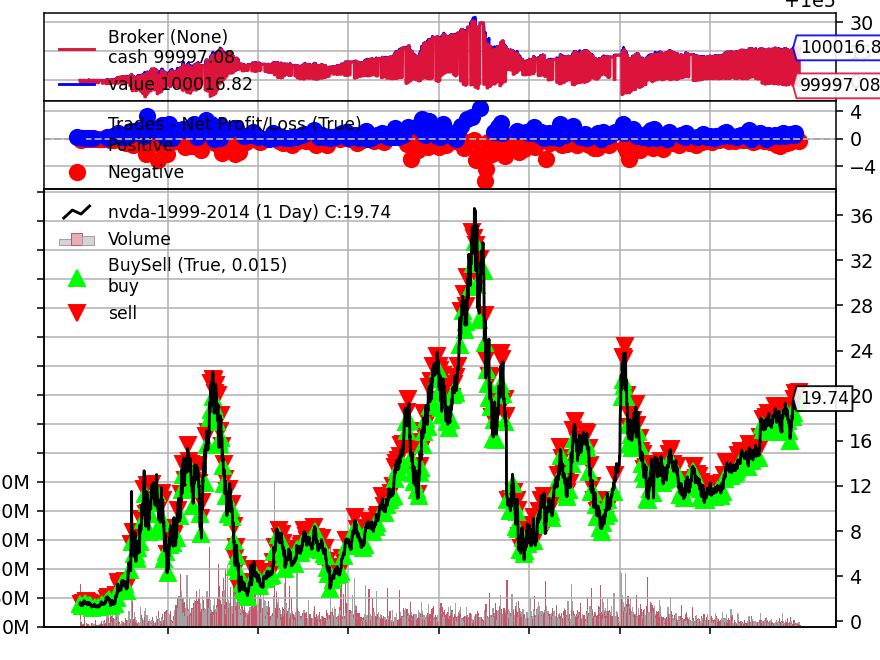

In [7]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    name = 'nvda-1999-2014.txt' # 'orcl-1995-2014.txt

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
#     modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
#     datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname= name,
        # Do not pass values before this date
        fromdate=datetime.datetime(1999, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2014, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    
    cerebro.plot()

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])
import math 

# Import the backtrader platform
import backtrader as bt

class GoldenCross(bt.Strategy) :
    
    params = (('fast',200),('slow',50))
    
    def __init__ (self) :
        self.sma1 = bt.indicators.SMA(self.data.close, period = self.params.fast, plotname = '200 moving average') 
        self.sma2 = bt.indicators.SMA(self.data.close, period = self.params.slow, plotname = '50 moving average') 
        self.crossover = bt.ind.CrossOver(self.sma1, self.sma2) 
    
    def next(self) :
        if self.position == 0 :
            if crossover > 0 :
                self.numShares = floor(self.broker.cash/self.data.close)
                
                print("BUY {} shares at {}".format(self.numShares,self.daa.close[0]))

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(GoldenCross)
    name = 'nvda-1999-2014.txt' # 'orcl-1995-2014.txt'
    print("djedf")

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname= name,
        # Do not pass values before this date
        fromdate=datetime.datetime(1999, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2014, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    
    cerebro.plot()